In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clusteringEND_W1W2.csv to clusteringEND_W1W2.csv


In [ ]:
df=pd.read_csv("clusteringEND_W1W2.csv")

df.head()

,id,Va,Ia,PFa,Waktu M1,Pa1,Waktu M2,Pa2,Percent Up from Previous Week,Waktu
0,1,240.12,18.2,0.48,2020-01-01 01:00:00,754,2020-01-08 01:00:00,2036,1.700265,1
1,2,240.17,18.0,0.48,2020-01-01 01:00:00,955,2020-01-08 01:00:00,2011,1.105759,1
2,3,240.31,18.1,0.48,2020-01-01 01:00:00,774,2020-01-08 01:00:00,2016,1.604651,1
3,4,240.14,18.0,0.48,2020-01-01 01:00:00,960,2020-01-08 01:00:00,2001,1.084375,1
4,5,240.08,18.0,0.48,2020-01-01 01:00:00,769,2020-01-08 01:00:00,1996,1.595579,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             9660 non-null   int64  
 1   Va                             9660 non-null   float64
 2   Ia                             9660 non-null   float64
 3   PFa                            9660 non-null   float64
 4   Waktu M1                       9660 non-null   object 
 5   Pa1                            9660 non-null   int64  
 6   Waktu M2                       9660 non-null   object 
 7   Pa2                            9660 non-null   int64  
 8   Percent Up from Previous Week  9660 non-null   float64
 9   Waktu                          9660 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 754.8+ KB


In [ ]:
df_x=df.iloc[:,7:9]
df_x

,Pa2,Percent Up from Previous Week
0,2036,1.700265
1,2011,1.105759
2,2016,1.604651
3,2001,1.084375
4,1996,1.595579
...,...,...
9655,2378,0.041612
9656,1951,-0.154679
9657,2192,-0.044047
9658,2202,-0.111739


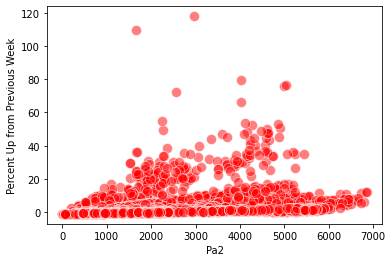

In [ ]:
sns.scatterplot(x = 'Pa2' , y= 'Percent Up from Previous Week' , data=df, s=100, color= 'red' , alpha = 0.5)

In [ ]:
x_array = np.array(df_x)
print(x_array)

[[ 2.03600000e+03  1.70026525e+00]
 [ 2.01100000e+03  1.10575916e+00]
 [ 2.01600000e+03  1.60465116e+00]
 ...
 [ 2.19200000e+03 -4.40470999e-02]
 [ 2.20200000e+03 -1.11738604e-01]
 [ 2.15200000e+03  4.41533236e-02]]


# ELBOW method

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_array)
    Sum_of_squared_distances.append(km.inertia_)

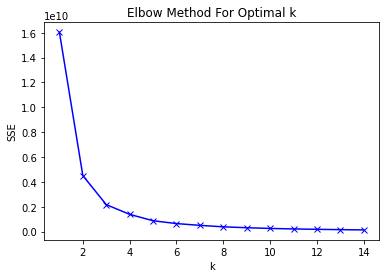

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
print(Sum_of_squared_distances)

[16040570717.690788, 4502816949.546055, 2165776563.198754, 1380326895.8122768, 866644539.0376302, 637973101.5944748, 495316400.5631595, 376444757.78264856, 305148980.6427647, 247722391.03298616, 207008711.64955762, 176838862.33481148, 149689761.87134507, 128262130.28902248]


In [ ]:
import numpy as np

def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.sqrt(np.square(np.subtract(actual,pred)).mean())

actual = [8632277999.843529, 2636566497.362353, 1311383203.64214, 822991402.4534328, 532276850.6001402, 388194759.8556494, 299417696.04807365, 226097335.47984323, 179225290.21195048, 145353547.6086932, 117873782.88327333, 100821616.66914353, 87659487.3517637, 73521409.8713876]
pred = [16040570717.690788, 4502816949.546055, 2165781230.530234, 1382247779.869866, 866644539.0376302, 637888688.9997644, 495679565.5903066, 376420327.27551943, 303812555.6649774, 247464675.58592543, 206942985.11537898, 177160918.9035375, 149679469.80406576, 127834039.19141814]

rmse(actual, pred)

2064845652.8478568

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.29683627, 0.02271421],
       [0.29319143, 0.01771332],
       [0.2939204 , 0.02190992],
       ...,
       [0.31958011, 0.00804133],
       [0.32103805, 0.00747192],
       [0.31374836, 0.00878325]])

# INI PRINT TEMPAT UNTUK ELBOW

In [ ]:
  from numpy import asarray
  from numpy import savetxt
  # define data
  x_scaled = scaler.fit_transform(x_array)
  # save to csv file
  savetxt('hasil_data_1.csv', x_scaled, delimiter=',')

In [ ]:
from google.colab import files
files.download("hasil_data_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# LANJUT CODE

KMEANS

In [ ]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 3, random_state=123)
# Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[0.31756859 0.03101626]
 [0.61840079 0.05836364]
 [0.14370705 0.01119787]]


In [ ]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
df["kluster"] = kmeans.labels_
df.head()

[0 0 0 ... 0 0 0]


,id,Va,Ia,PFa,Waktu M1,Pa1,Waktu M2,Pa2,Percent Up from Previous Week,Waktu,kluster
0,1,240.12,18.2,0.48,2020-01-01 01:00:00,754,2020-01-08 01:00:00,2036,1.700265,1,0
1,2,240.17,18.0,0.48,2020-01-01 01:00:00,955,2020-01-08 01:00:00,2011,1.105759,1,0
2,3,240.31,18.1,0.48,2020-01-01 01:00:00,774,2020-01-08 01:00:00,2016,1.604651,1,0
3,4,240.14,18.0,0.48,2020-01-01 01:00:00,960,2020-01-08 01:00:00,2001,1.084375,1,0
4,5,240.08,18.0,0.48,2020-01-01 01:00:00,769,2020-01-08 01:00:00,1996,1.595579,1,0


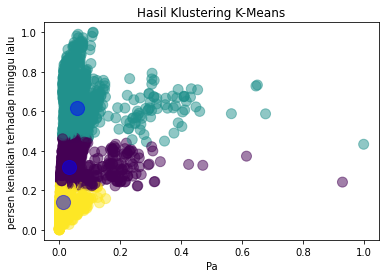

In [ ]:
 fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 100,
c = df.kluster, marker = "o", alpha = 0.5) 
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Pa")
plt.ylabel("persen kenaikan terhadap minggu lalu")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


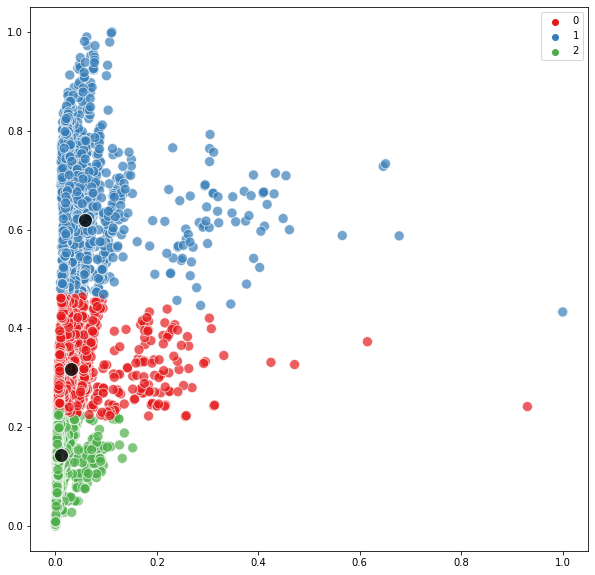

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(x_scaled[:,1], x_scaled[:,0], hue = df.kluster, palette="Set1", s = 100, alpha = 0.7)
sns.scatterplot(centers[:,1], centers[:,0], color = "k", s = 200, alpha = 0.8);

In [ ]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
df["kluster"] = kmeans.labels_
df.head()


[0 0 0 ... 0 0 0]


,id,Va,Ia,PFa,Waktu M1,Pa1,Waktu M2,Pa2,Percent Up from Previous Week,Waktu,kluster
0,1,240.12,18.2,0.48,2020-01-01 01:00:00,754,2020-01-08 01:00:00,2036,1.700265,1,0
1,2,240.17,18.0,0.48,2020-01-01 01:00:00,955,2020-01-08 01:00:00,2011,1.105759,1,0
2,3,240.31,18.1,0.48,2020-01-01 01:00:00,774,2020-01-08 01:00:00,2016,1.604651,1,0
3,4,240.14,18.0,0.48,2020-01-01 01:00:00,960,2020-01-08 01:00:00,2001,1.084375,1,0
4,5,240.08,18.0,0.48,2020-01-01 01:00:00,769,2020-01-08 01:00:00,1996,1.595579,1,0


[0 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


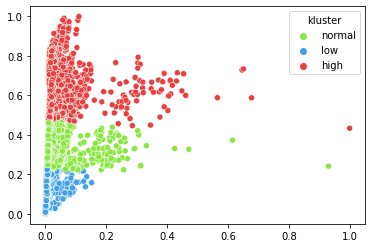

In [ ]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
df["kluster"] = kmeans.labels_
df.head()

# define rename schema
mynames = {"0": "normal", "1": "high", "2": "low"}
df["kluster"] = [mynames[str(i)] for i in df.kluster]
sns.scatterplot(x_scaled[:,1], x_scaled[:,0], hue = df.kluster, palette=('#8be640','#40a1e6','#e64040'))


plt.show()

In [ ]:
# save dataframe as CSV
df.to_csv("myoutput_nolabels.csv")
from google.colab import files
files.download("myoutput_nolabels.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# END